In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv("C:\Titanic-ML\Dataset\Titanic-Dataset.csv")
print(titanic.info())
print(titanic.describe())


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\deepa\AppData\Local\Temp\ipykernel_15240\2389602728.py:5: SyntaxWarning: invalid escape sequence '\T'
  titanic = pd.read_csv("C:\Titanic-ML\Dataset\Titanic-Dataset.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [24]:
print(titanic.isnull())
print(titanic.isnull().sum())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

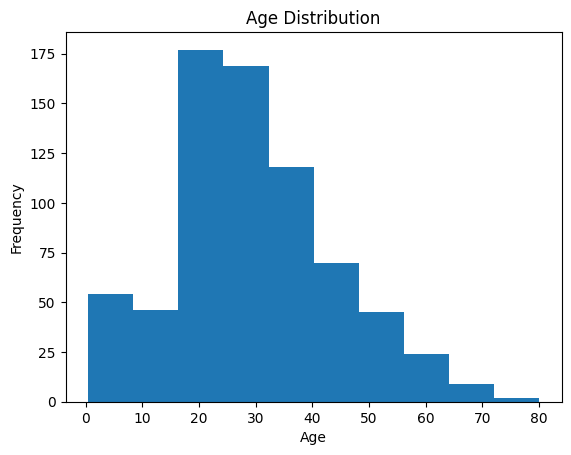

In [26]:
titanic['Age'].plot(kind='hist', bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

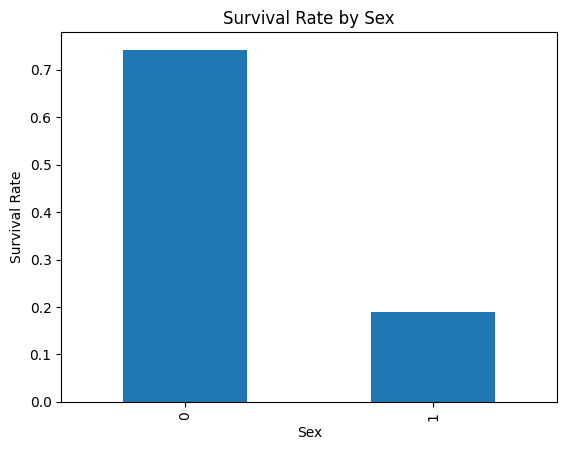

In [27]:
titanic['Sex'] = titanic['Sex'].map({"male": 1, 'female':0})
titanic.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

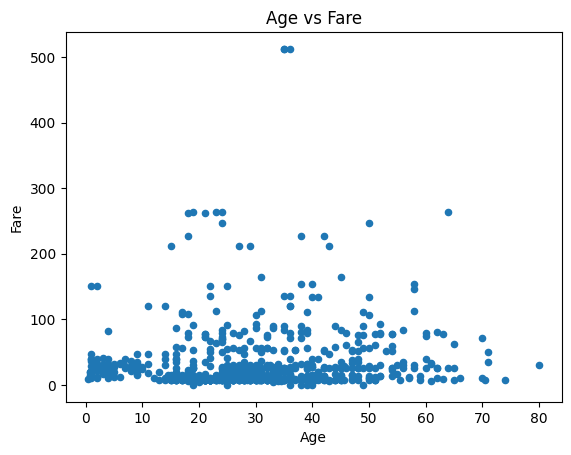

In [28]:
titanic.plot.scatter(x='Age', y='Fare')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [29]:
# Data Preprocessing - Data Cleaning
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Age'].isna().sum()
cabin_class = titanic.dropna(subset=['Cabin'])
print(cabin_class)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Age'].isna().sum()
cabin_class = titanic.dropna(subset=['Cabin'])
print(cabin_class)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name  Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
6                              McCarthy, Mr. Timothy J    1  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut    0   4.0      1   
11                            Bonnell, Miss. Elizabeth    0  58.0      0   
..                                                 ...  ...   ...    ...   
871   Beckw

In [30]:
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})
titanic['Embarked'] = titanic['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris  NaN  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  NaN  38.000000      1   
2                               Heikkinen, Miss. Laina  NaN  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  NaN  35.000000      1   
4                             Allen, Mr. William Henry  NaN  35.000000      0   
..                                                 ...  .

In [31]:
print(titanic['Fare'].corr(titanic['SibSp']))
print(titanic['Fare'].corr(titanic['Survived']))

0.1596510432421609
0.2573065223849622


In [32]:
# Predicting Survival based on Age
from sklearn.neighbors import KNeighborsClassifier


x = titanic[['Age']]
y = titanic['Survived']
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x, y) 
pred = model.predict([[19]])
print("Prediting the sirvival of a 19 year old Boy: " + ("Survived" if pred[0] ==1 else "Not Survived"))

Prediting the sirvival of a 19 year old Boy: Not Survived


c:\Users\deepa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [2]:
# Predicting survival in Titanic dataset
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

titanic = pd.read_csv("C:\Titanic-ML\Dataset\Titanic-Dataset.csv")

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())
titanic['Sex'] = titanic['Sex'].fillna(titanic['Sex'].mode()[0])
titanic['Sex'] = titanic['Sex'].map({"male": 1, "female": 0})

feat = ['Age','Pclass','Sex','Fare']
x = titanic[feat]
y = titanic['Survived']
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x, y)

pred = model.predict([[19, 3, 1, 7.25]])
print("The prediction for a 19-year-old boy in third class, who paid ticket fare 7.25 is: " + ("Survived" if pred[0] == 1 else "Not Survived"))


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\deepa\AppData\Local\Temp\ipykernel_15240\4153004461.py:5: SyntaxWarning: invalid escape sequence '\T'
  titanic = pd.read_csv("C:\Titanic-ML\Dataset\Titanic-Dataset.csv")


The prediction for a 19-year-old boy in third class, who paid ticket fare 7.25 is: Not Survived


c:\Users\deepa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [35]:
# Testing Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(x_train, y_train)
pred2 = model.predict(x_test)
accuracy =  accuracy_score(y_test, pred2)
print(f"The accuracy of the model is: {accuracy:.2%}")

The accuracy of the model is: 69.27%
